In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import seaborn as sns
dataFrame = pd.read_csv("heart_2020_cleaned.csv")
dataFrame

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
dataFrame.shape

(319795, 18)

In [5]:
dataFrame.isnull().sum() # Checking That Dataset Have Null Value Or Not

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
dataFrame.duplicated().sum() #Cheking How Many Duplicate Row Dataset Have 

18078

In [7]:
dataFrame.drop_duplicates(inplace=True) # Droping Duplicate Value 

In [8]:
dataFrame.shape # After Droping Duplicate Value Shape Of DataSet

(301717, 18)

In [9]:
dataFrame.info() #Checking DataType Of Column 

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

In [10]:
dataFrame.describe() # Describing DataSet 

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [11]:
dataFrame.nunique() # From This We Can Know That which Column have Numeric Value Or Category 

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [12]:
'''From This We Conclude That Dataset Is Heavily Imbalanced
    Because The DataSet Is More Align To No-Heart Disease Patient
    So I Have To Remove Noise And Critical point From DataSet
    To Bifurcate Heart Disease Patient So I Can Predict Accurate 
    Result From Symptoms.'''
print(dataFrame["HeartDisease"].value_counts())

HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64


<Axes: >

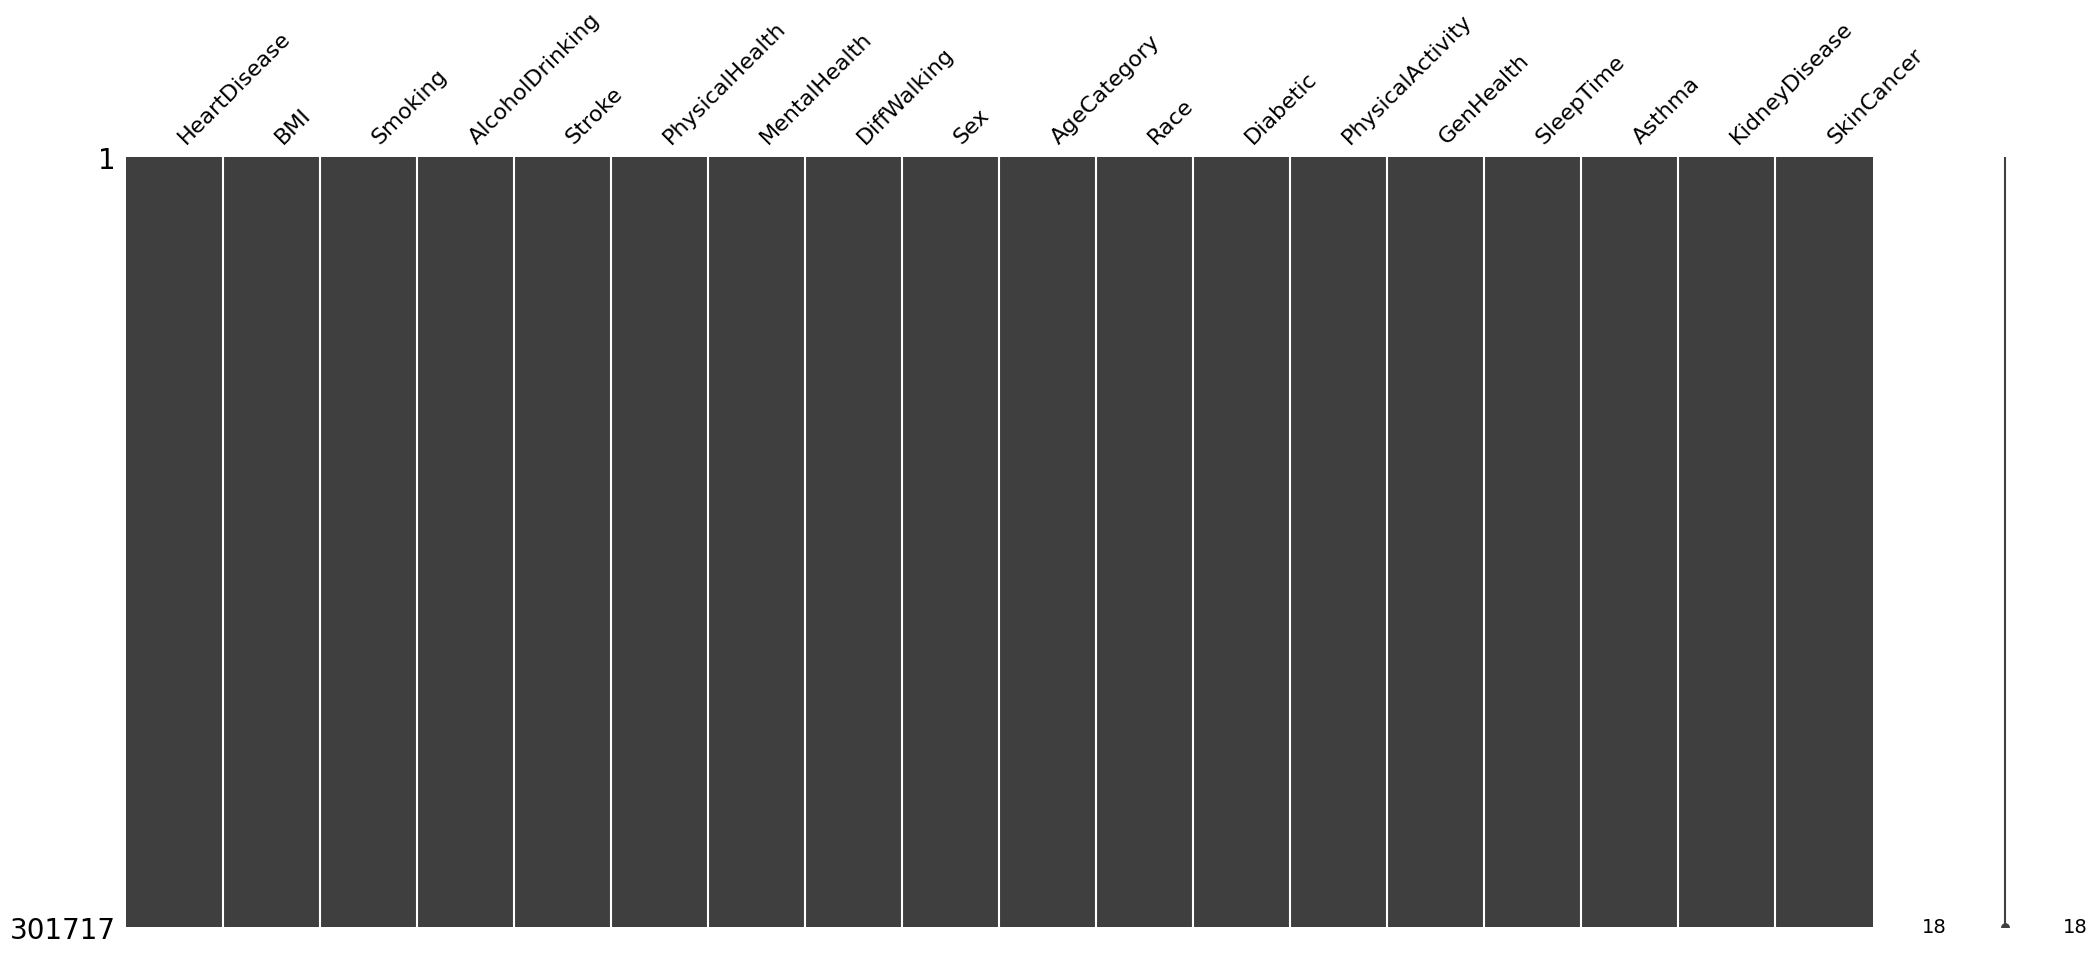

In [13]:
import missingno as mn
mn.matrix(dataFrame)

BMI                  Axes(0.125,0.747241;0.133621x0.132759)
PhysicalHealth    Axes(0.285345,0.747241;0.133621x0.132759)
MentalHealth       Axes(0.44569,0.747241;0.133621x0.132759)
SleepTime         Axes(0.606034,0.747241;0.133621x0.132759)
dtype: object

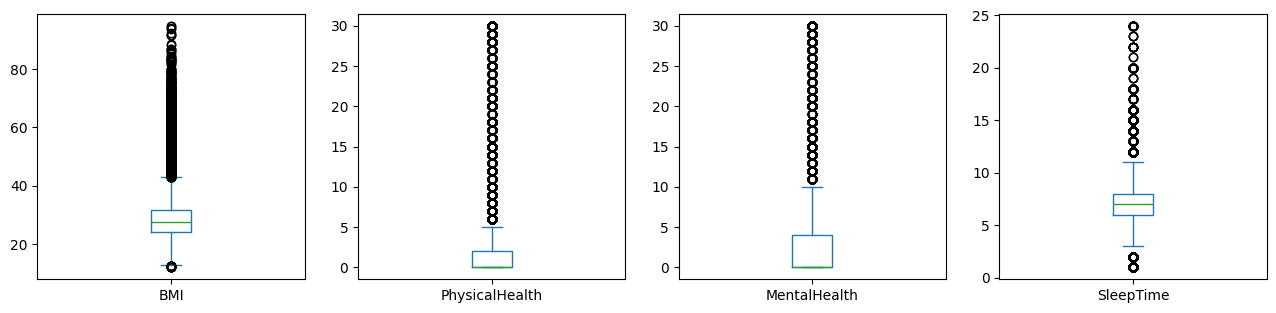

In [14]:
dataFrame.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (5,5))

In [15]:
def Remove_out(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    low  = q1 - 1.5*IQR
    high=  q3 + 1.5*IQR
    print(low , "-",high)
    return df[(df[col]>=low) & (df[col]<=high)] 
dataFrame= Remove_out(dataFrame,"BMI")
dataFrame

12.600000000000005 - 43.08


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


BMI                  Axes(0.125,0.747241;0.133621x0.132759)
PhysicalHealth    Axes(0.285345,0.747241;0.133621x0.132759)
MentalHealth       Axes(0.44569,0.747241;0.133621x0.132759)
SleepTime         Axes(0.606034,0.747241;0.133621x0.132759)
dtype: object

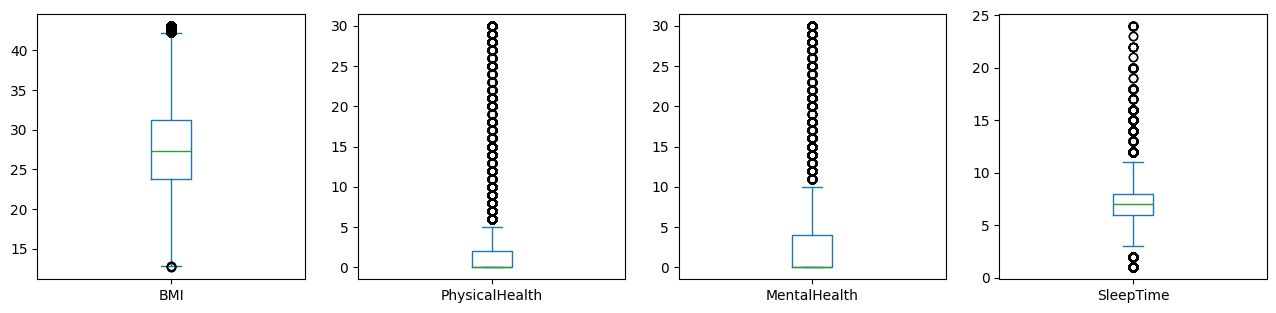

In [16]:
dataFrame.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (5,5))

In [17]:
le = LabelEncoder()

categoricalColumn = []
numericalColumn = []
dataFrame1 = dataFrame.copy(deep=True)
for i in dataFrame.columns:
    if len(dataFrame[i].unique()) > 6:
        numericalColumn.append(i)
    else:
        dataFrame1[i]=le.fit_transform(dataFrame1[i])
        categoricalColumn.append(i)
print("Categorical Columns",categoricalColumn)
print("Numerical Columns",numericalColumn)

Categorical Columns ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
Numerical Columns ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']


In [18]:
sorted(dataFrame["Race"].unique()) # This How LabelEncoder Works

['American Indian/Alaskan Native',
 'Asian',
 'Black',
 'Hispanic',
 'Other',
 'White']

In [19]:
dataFrame["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [20]:
dataFrame.head() # Original Data Frame 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [21]:
dataFrame1
# Encoded Data Frame

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0.0,0.0,0,0,18-24,3,0,1,0,8.0,0,0,0
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,3,0,1,2,6.0,0,0,0


In [22]:
def convert_age_range_to_mean(age):
    if isinstance(age, int):
        return float(age)
    
    if '-' in age:
        age_min, age_max = age.split('-')
        return (float(age_min) + float(age_max)) / 2
    
    if ' or older' in age:
        age_min = age.replace(' or older', '')
        return float(age_min) + 10  # treats '80 or older' as 90

    return float(age)  # or any other default value you prefer

dataFrame1['AgeCategory'] = dataFrame1['AgeCategory'].apply(convert_age_range_to_mean)

In [23]:
dataFrame1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57.0,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,90.0,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67.0,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77.0,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42.0,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0.0,0.0,0,0,21.0,3,0,1,0,8.0,0,0,0
319790,1,27.41,1,0,0,7.0,0.0,1,1,62.0,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,37.0,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,47.0,3,0,1,2,6.0,0,0,0


c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes.ArtistList of 4 patches>


c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

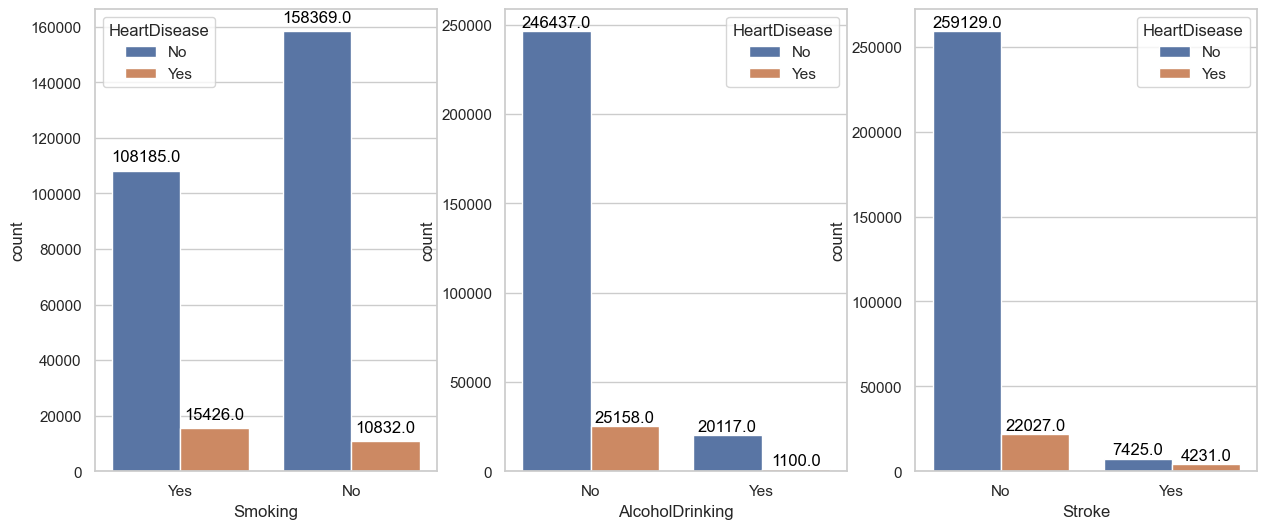

In [24]:
sns.set(style="whitegrid")  # Set the style of the plot
fig, axes = plt.subplots(1,3, figsize=(15,6))
axes[0] = sns.countplot(data=dataFrame,x="Smoking",hue="HeartDisease",ax = axes[0])
print(axes[0].patches)
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
                ha='center', va='center', fontsize=12, color='black')
axes[1]=sns.countplot(data=dataFrame,x="AlcoholDrinking",hue="HeartDisease",ax = axes[1])
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
                ha='center', va='center', fontsize=12, color='black')
axes[2] = sns.countplot(data=dataFrame,x="Stroke",hue="HeartDisease",ax = axes[2])
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
                ha='center', va='center', fontsize=12, color='black')

    

In [25]:
dataFrame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292812 entries, 0 to 319793
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      292812 non-null  int32  
 1   BMI               292812 non-null  float64
 2   Smoking           292812 non-null  int32  
 3   AlcoholDrinking   292812 non-null  int32  
 4   Stroke            292812 non-null  int32  
 5   PhysicalHealth    292812 non-null  float64
 6   MentalHealth      292812 non-null  float64
 7   DiffWalking       292812 non-null  int32  
 8   Sex               292812 non-null  int32  
 9   AgeCategory       292812 non-null  float64
 10  Race              292812 non-null  int32  
 11  Diabetic          292812 non-null  int32  
 12  PhysicalActivity  292812 non-null  int32  
 13  GenHealth         292812 non-null  int32  
 14  SleepTime         292812 non-null  float64
 15  Asthma            292812 non-null  int32  
 16  KidneyDisease     292812 

c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

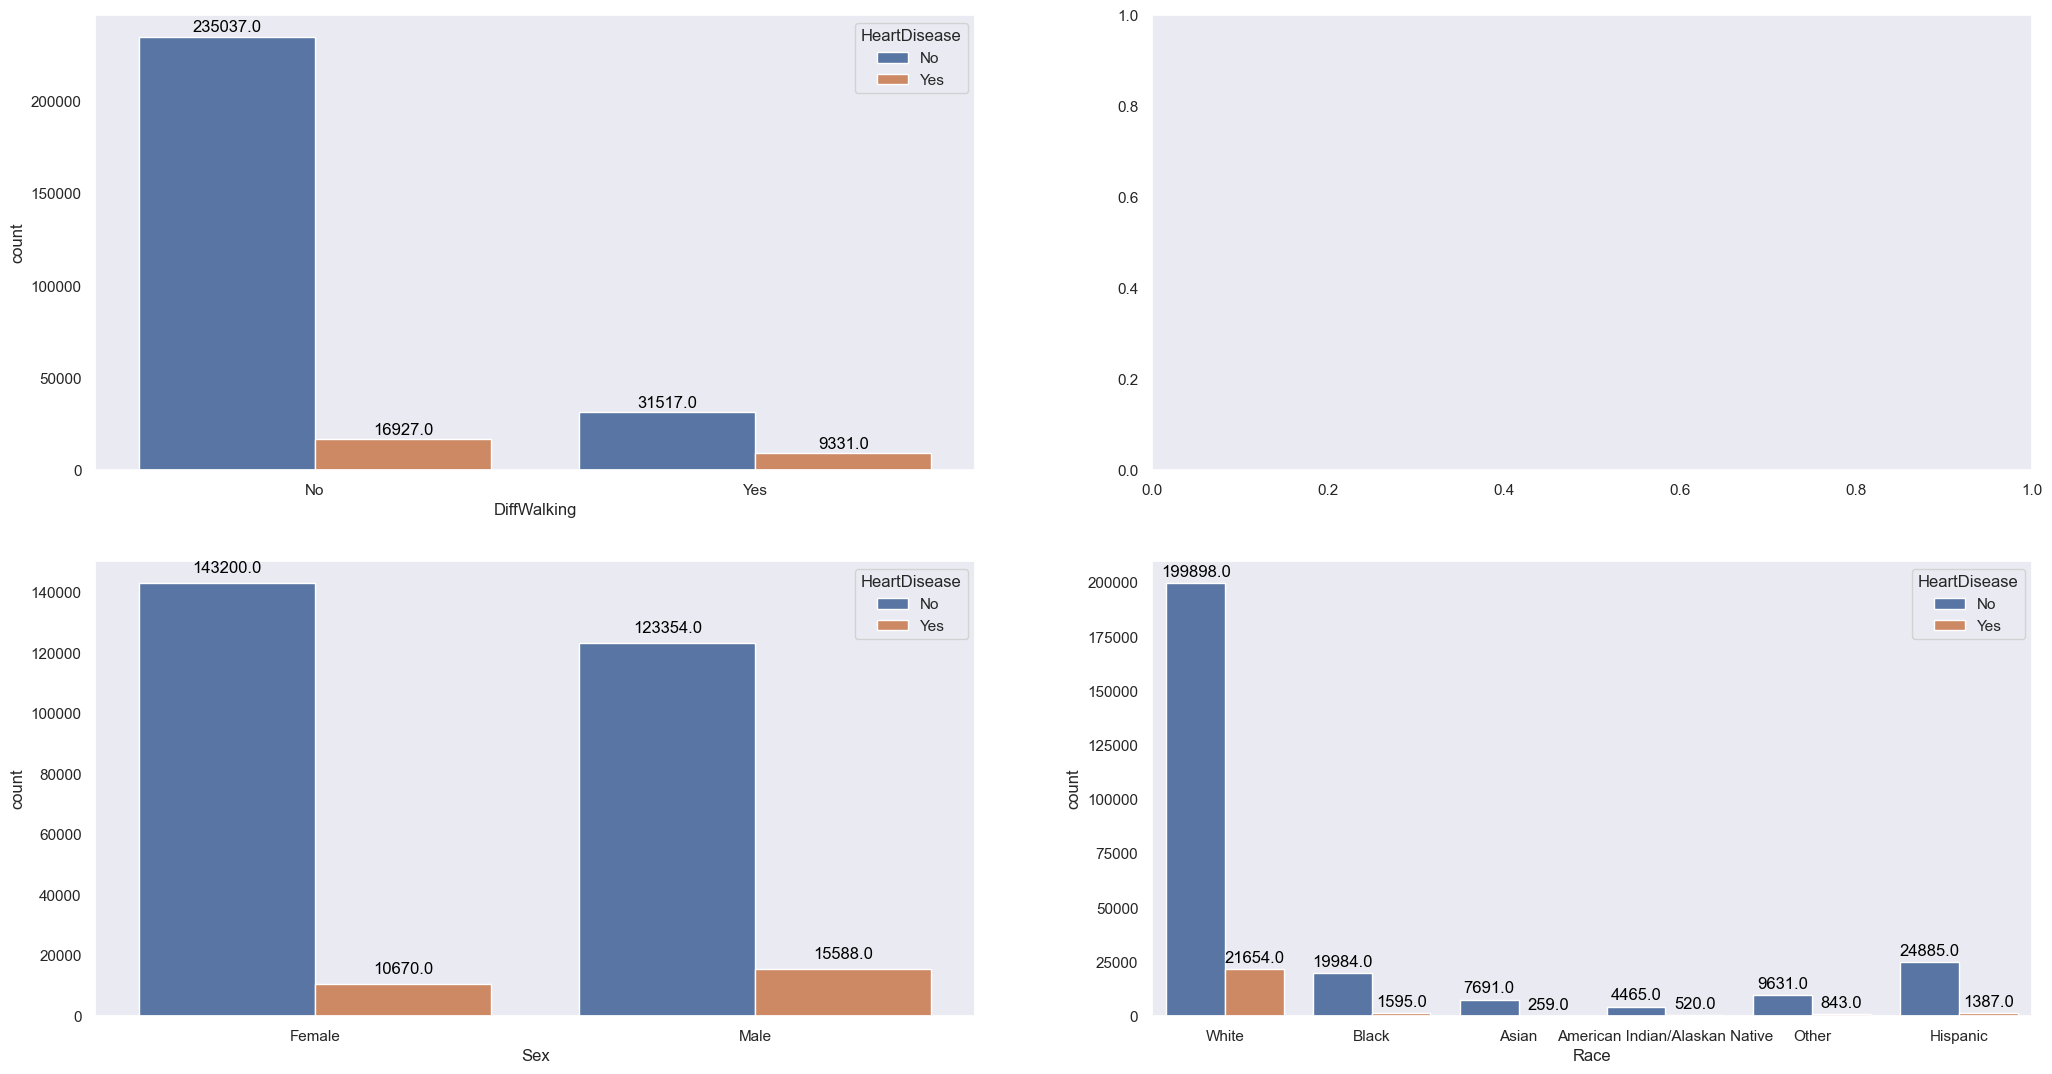

In [26]:
sns.set(style="dark")  # Set the style of the plot
fig, axes = plt.subplots(2,2, figsize=(25,13))
axes[0,0] = sns.countplot(data=dataFrame,x="DiffWalking",hue="HeartDisease",ax = axes[0,0])
for p in axes[0,0].patches:
    axes[0,0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
                ha='center', va='center', fontsize=12, color='black')
axes[1,0]=sns.countplot(data=dataFrame,x="Sex",hue="HeartDisease",ax = axes[1,0])
for p in axes[1,0].patches:
    axes[1,0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
                ha='center', va='center', fontsize=12, color='black')
axes[1,1] = sns.countplot(data=dataFrame,x="Race",hue="HeartDisease",ax = axes[1,1])
for p in axes[1,1].patches:
    axes[1,1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
                ha='center', va='center', fontsize=12, color='black')
    

c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

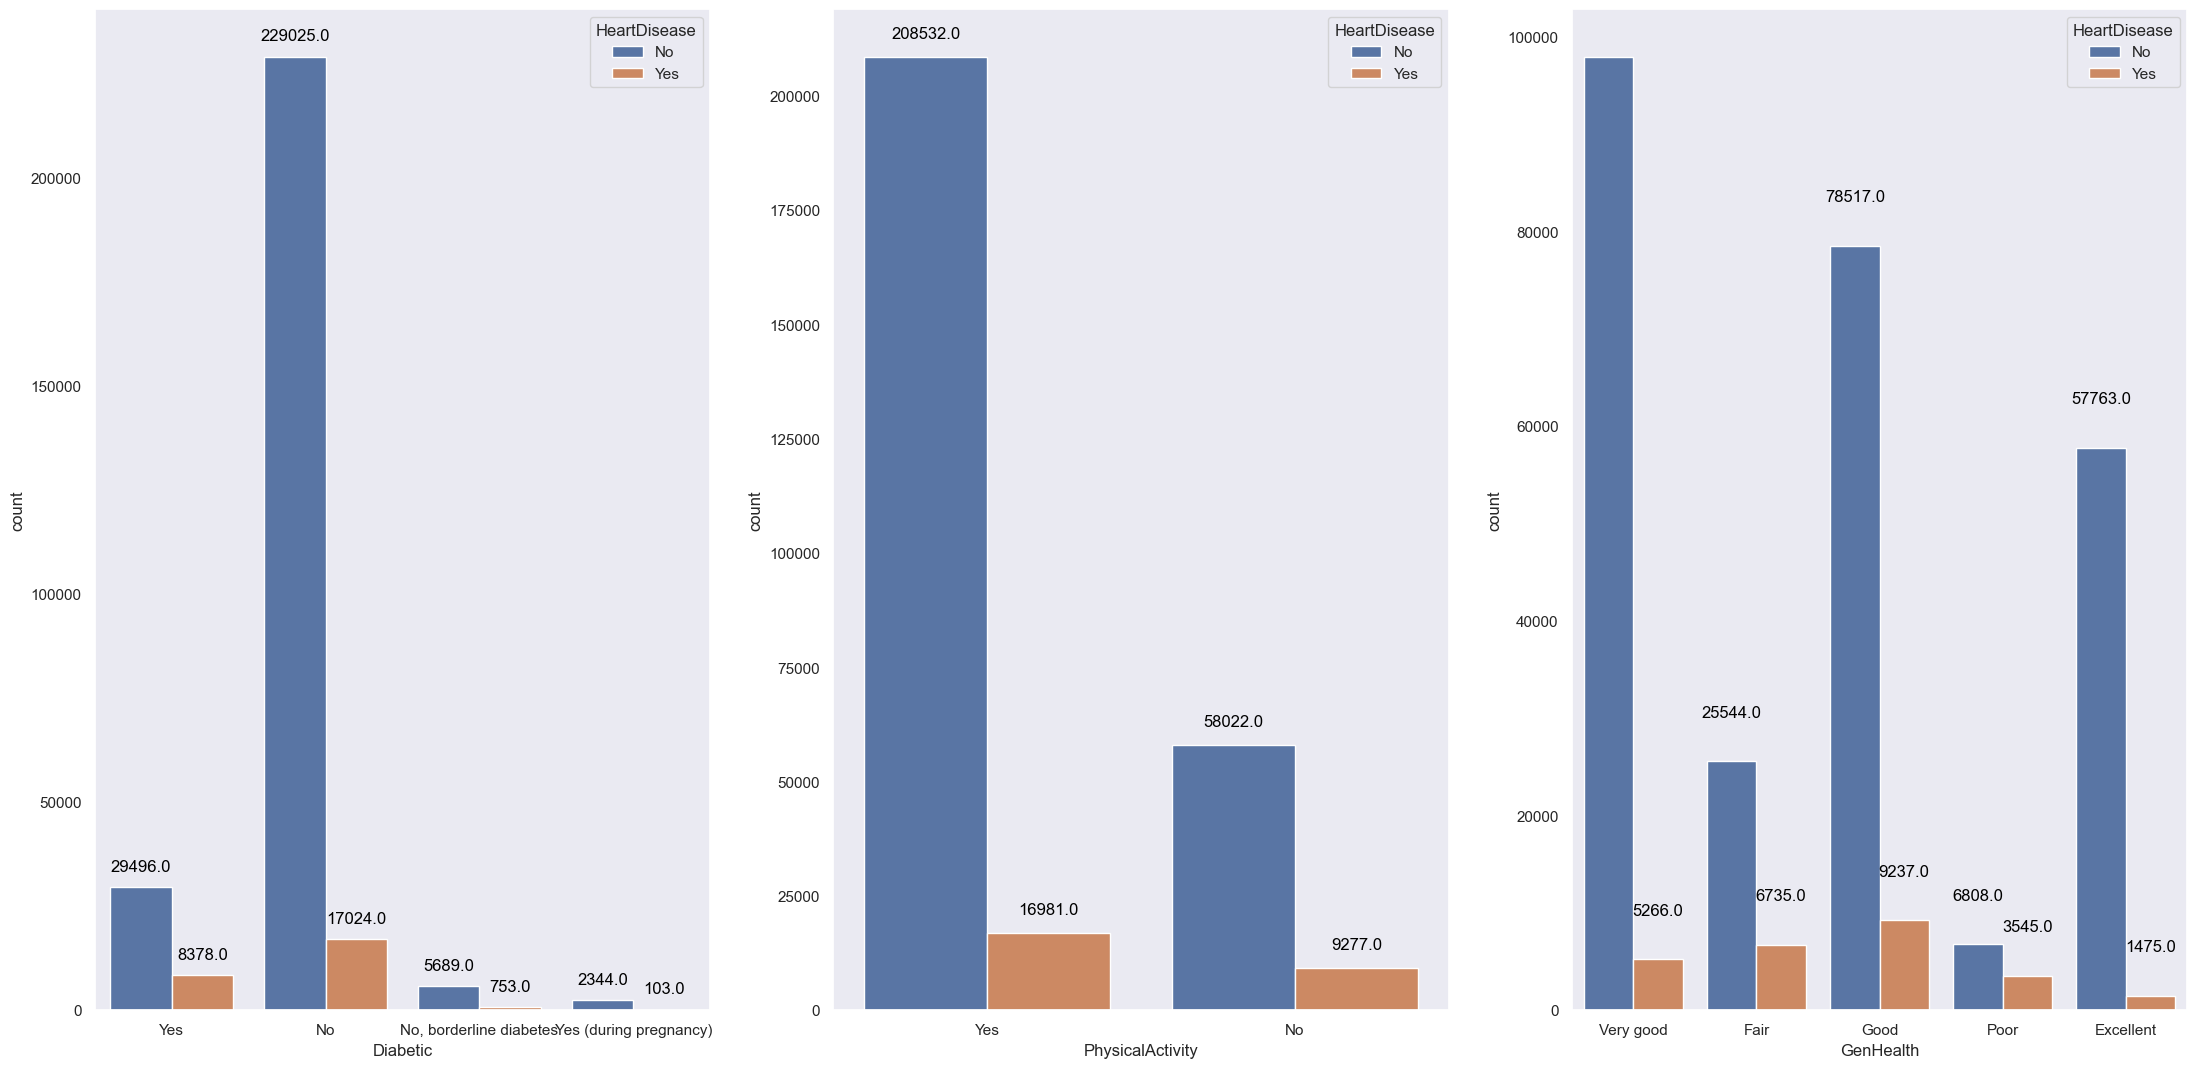

In [27]:
sns.set(style="dark")  # Set the style of the plot
fig, axes = plt.subplots(1,3, figsize=(27,13))
axes[0] = sns.countplot(data=dataFrame,x="Diabetic",hue="HeartDisease",ax = axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
                ha='center', va='center', fontsize=12, color='black')
axes[1]=sns.countplot(data=dataFrame,x="PhysicalActivity",hue="HeartDisease",ax = axes[1])
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
                ha='center', va='center', fontsize=12, color='black')
axes[2] = sns.countplot(data=dataFrame,x="GenHealth",hue="HeartDisease",ax = axes[2])
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
                ha='center', va='center', fontsize=12, color='black')

c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

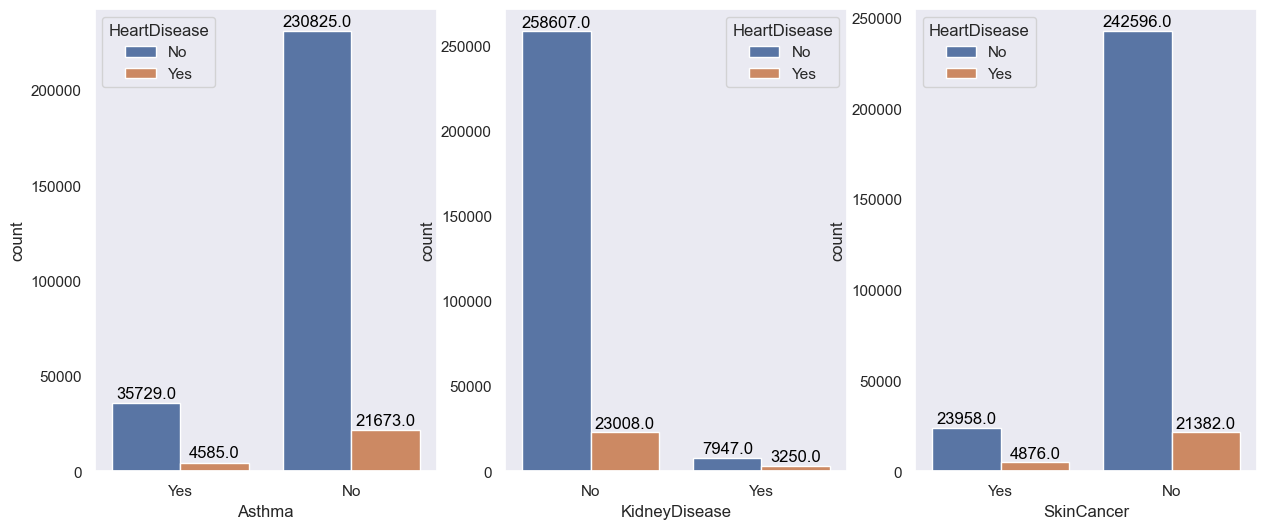

In [28]:
sns.set(style="dark")  # Set the style of the plot
fig, axes = plt.subplots(1,3, figsize=(15,6))
axes[0] = sns.countplot(data=dataFrame,x="Asthma",hue="HeartDisease",ax = axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
                ha='center', va='center', fontsize=12, color='black')
axes[1]=sns.countplot(data=dataFrame,x="KidneyDisease",hue="HeartDisease",ax = axes[1])
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
                ha='center', va='center', fontsize=12, color='black')
axes[2] = sns.countplot(data=dataFrame,x="SkinCancer",hue="HeartDisease",ax = axes[2])
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5000),
                ha='center', va='center', fontsize=12, color='black')


In [29]:
dataFrame1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57.0,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,90.0,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67.0,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77.0,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42.0,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0.0,0.0,0,0,21.0,3,0,1,0,8.0,0,0,0
319790,1,27.41,1,0,0,7.0,0.0,1,1,62.0,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,37.0,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,47.0,3,0,1,2,6.0,0,0,0


c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

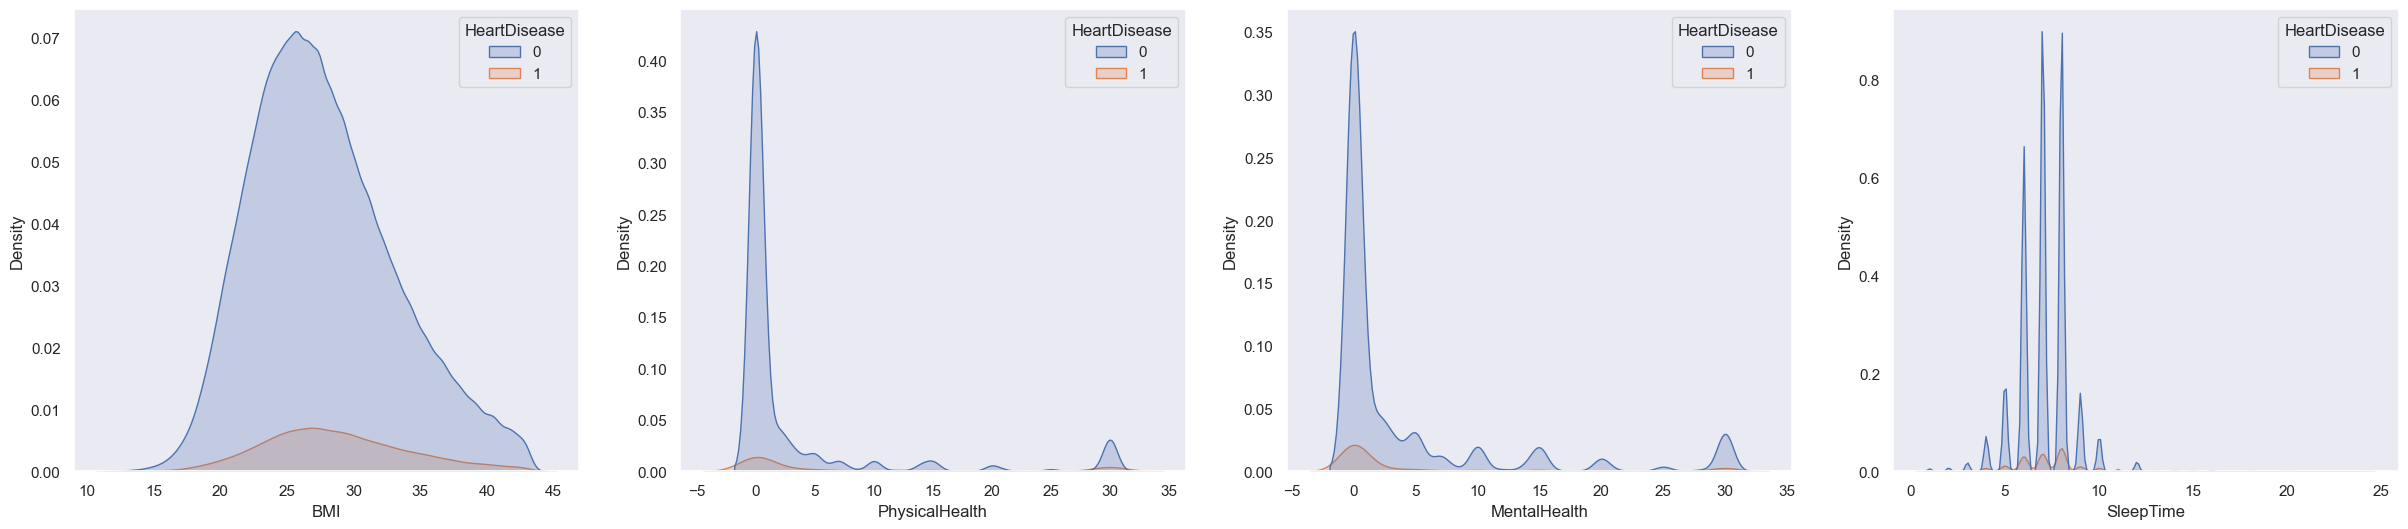

In [30]:
fig ,axes= plt.subplots(1,4,figsize = (30,6))
for i in range(len(numericalColumn)):
    if numericalColumn[i]=="SleepTime":
        sns.kdeplot(data=dataFrame1,x=numericalColumn[i],hue="HeartDisease",ax = axes[i-1],fill=True)  
    elif numericalColumn[i] != "AgeCategory":
        sns.kdeplot(data=dataFrame1,x=numericalColumn[i],hue="HeartDisease",ax = axes[i],fill=True)

([<matplotlib.patches.Wedge at 0x177a0831bd0>,
 [Text(-1.056635548700959, 0.30581255242619365, 'No'),
  Text(1.0566355272267782, -0.30581262662321257, 'Yes')],
 [Text(-0.5763466629277958, 0.1668068467779238, '91%'),
  Text(0.5763466512146063, -0.16680688724902504, '9%')])

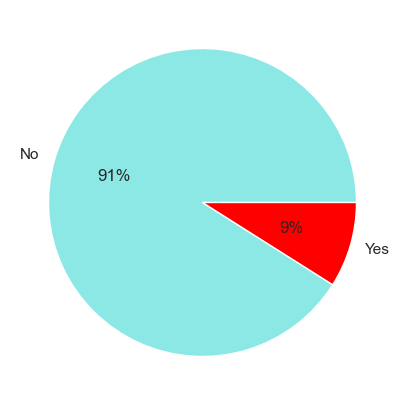

In [31]:
da2=dataFrame['HeartDisease'].value_counts().values
plt.figure(figsize = (5,5))
plt.pie(da2, labels=['No','Yes'], colors=["#8BE8E5","#FF0000"], autopct='%.0f%%')

<Axes: >

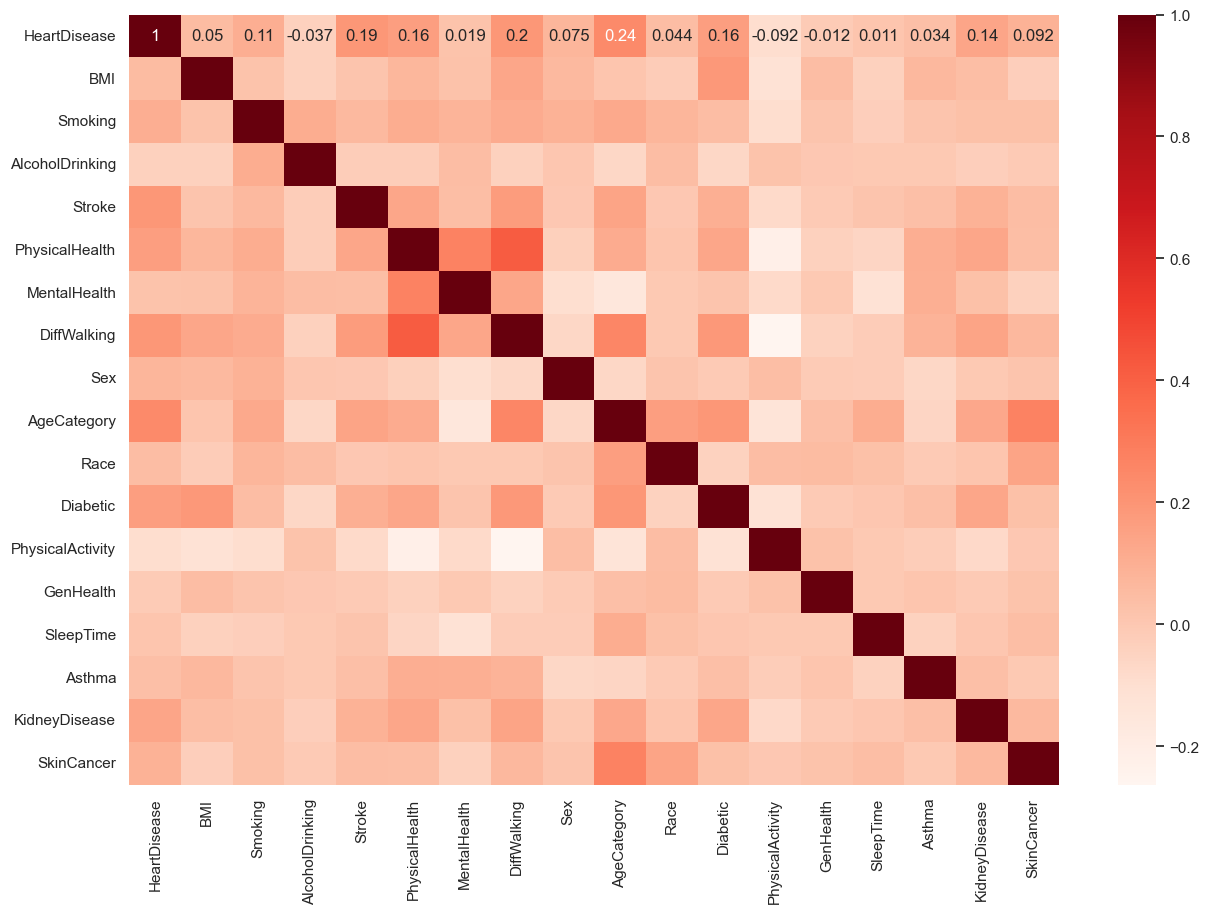

In [32]:
plt.figure(figsize = (15,10))
sns.heatmap(dataFrame1.corr(),annot = True,cmap='Reds')

In [33]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression

x = dataFrame1.drop('HeartDisease',axis=1)
y = dataFrame1['HeartDisease']
x_simple_train,x_simple_test,y_simple_train,y_simple_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

oversample = RandomOverSampler(random_state=42)
xover,yover = oversample.fit_resample(x,y)
x_over_train,x_over_test,y_over_train,y_over_test = train_test_split(xover,yover,test_size = 0.30,random_state = 42)

undersample = RandomUnderSampler(random_state=42)
xunder,yunder = undersample.fit_resample(x,y)
x_under_train,x_under_test,y_under_train,y_under_test = train_test_split(xunder,yunder,test_size = 0.30,random_state = 42)

smote = SMOTE(random_state=42)
xsmote,ysmote = smote.fit_resample(x,y)
x_smote_train,x_smote_test,y_smote_train,y_smote_test = train_test_split(xsmote,ysmote,test_size = 0.30,random_state = 42)


c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File

# Model Traning 

In [34]:
'''RandomForest Without Over Or Under Sample'''
RFC_MODEL_SIMPLE  = RandomForestClassifier(n_estimators = 100 ,max_depth=25,min_samples_split=5,max_features="log2")
print(x_simple_train.shape)
print(x_simple_test.shape)
print(y_simple_train.shape)
print(y_simple_test.shape)

RFC_MODEL_SIMPLE.fit(x_simple_train,y_simple_train)
y_simple_pred=RFC_MODEL_SIMPLE.predict(x_simple_test)
print("Train Score : ",RFC_MODEL_SIMPLE.score(x_simple_train,y_simple_train)," Test Score : ",RFC_MODEL_SIMPLE.score(x_simple_test,y_simple_test))

(204968, 17)
(87844, 17)
(204968,)
(87844,)
Train Score :  0.9539001209944967  Test Score :  0.911024088156277


# Over Sample The Data 

In [35]:

RFC_MODEL_OVER  = RandomForestClassifier(n_estimators = 100)
print(x_over_train.shape)
print(x_over_test.shape)
print(y_over_train.shape)
print(y_over_test.shape)
RFC_MODEL_OVER.fit(x_over_train,y_over_train)
y_over_pred=RFC_MODEL_OVER.predict(x_over_test)
print("Train Score : ",RFC_MODEL_OVER.score(x_over_train,y_over_train)," Test Score : ",RFC_MODEL_OVER.score(x_over_test,y_over_test))
print(accuracy_score(y_over_test,y_over_pred)*100)


(373175, 17)
(159933, 17)
(373175,)
(159933,)
Train Score :  0.9978562336705299  Test Score :  0.9633096359100374
96.33096359100374


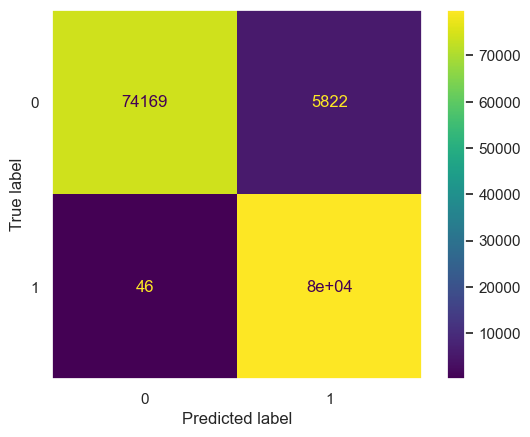

In [36]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmat = confusion_matrix(y_over_test,y_over_pred)
cdis = ConfusionMatrixDisplay(cmat)
cdis.plot()

# Undersampling the data may not be effective because the machine does not learn much from it

In [37]:
RFC_MODEL_UNDER  = RandomForestClassifier(n_estimators = 100 ,max_depth=25)
print(x_under_train.shape)
print(x_under_test.shape)
print(y_under_train.shape)
print(y_under_test.shape)
RFC_MODEL_UNDER.fit(x_under_train,y_under_train)
y_under_pred=RFC_MODEL_UNDER.predict(x_under_test)
print("Train Score : ",RFC_MODEL_UNDER.score(x_under_train,y_under_train)," Test Score : ",RFC_MODEL_UNDER.score(x_under_test,y_under_test))
print(accuracy_score(y_under_test,y_under_pred)*100)

(36761, 17)
(15755, 17)
(36761,)
(15755,)
Train Score :  0.984385626071108  Test Score :  0.7488416375753729
74.8841637575373


In [38]:
RFC_MODEL_SMOTE  = RandomForestClassifier(n_estimators = 100)
print(x_smote_train.shape)
print(x_smote_test.shape)
print(y_smote_train.shape)
print(y_smote_test.shape)

RFC_MODEL_SMOTE.fit(x_smote_train,y_smote_train)
y_smote_pred=RFC_MODEL_SMOTE.predict(x_smote_test)
print("Train Score : ",RFC_MODEL_SMOTE.score(x_smote_train,y_smote_train)," Test Score : ",RFC_MODEL_SMOTE.score(x_smote_test,y_smote_test))

(373175, 17)
(159933, 17)
(373175,)
(159933,)
Train Score :  0.9983948549608093  Test Score :  0.9000268862586208


In [39]:
import pickle

In [40]:

fileName = "Model.sav"
pickle.dump(RFC_MODEL_OVER, open(fileName,"wb"))

In [41]:
BERNOULLINB_MODEL_simple = BernoulliNB()
print(x_simple_train.shape)
print(x_simple_test.shape)
print(y_simple_train.shape)
print(y_simple_test.shape)
BERNOULLINB_MODEL_simple.fit(x_simple_train,y_simple_train)
y_simple_pred=BERNOULLINB_MODEL_simple.predict(x_simple_test)
print("Train Score : ",BERNOULLINB_MODEL_simple.score(x_simple_train,y_simple_train)," Test Score : ",BERNOULLINB_MODEL_simple.score(x_simple_test,y_simple_test))
print(accuracy_score(y_simple_test,y_simple_pred)*100)

(204968, 17)
(87844, 17)
(204968,)
(87844,)
Train Score :  0.8970229499238905  Test Score :  0.8967146304813077
89.67146304813078


In [43]:
LR_MODEL_SIMPLE  = LogisticRegression(C=1.0)
print(x_simple_train.shape)
print(x_simple_test.shape)
print(y_simple_train.shape)
print(y_simple_test.shape)

LR_MODEL_SIMPLE.fit(x_simple_train,y_simple_train)
y_simple_pred=LR_MODEL_SIMPLE.predict(x_simple_test)
print("Train Score : ",LR_MODEL_SIMPLE.score(x_simple_train,y_simple_train)," Test Score : ",LR_MODEL_SIMPLE.score(x_simple_test,y_simple_test))

(204968, 17)
(87844, 17)
(204968,)
(87844,)
Train Score :  0.9096200382498731  Test Score :  0.909692181594645


c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
VOTINGMODEL= VotingClassifier(estimators=[
    ('RandomForest', RFC_MODEL_OVER),
    ("LR MODEL",LR_MODEL_SIMPLE),
    ('BernaulliNB',BERNOULLINB_MODEL_simple)
], voting='hard')

In [45]:
VOTINGMODEL.fit(x_simple_train,y_simple_train)
y_voting_predict = VOTINGMODEL.predict(x_simple_test)
print(VOTINGMODEL.score(x_simple_test,y_simple_test))


c:\Users\Vraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9098515550293702
